In [9]:
import numpy as np
import matplotlib.pyplot as plt

sample_rate = 1e6
N = 10000 # number of samples to simulate

# Create a tone to act as the transmitter signal
t = np.arange(N)/sample_rate # time vector
f_tone = 0.02e6
tx = np.exp(2j * np.pi * f_tone * t)


In [10]:
d = 0.5 # half wavelength spacing
Nr = 5
theta_degrees = 93 # direction of arrival (feel free to change this, it's arbitrary)
theta = theta_degrees / 180 * np.pi # convert to radians
a = np.exp(-2j * np.pi * d * np.arange(Nr) * np.sin(theta)) # Steering Vector
print(a) # note that it's 3 elements long, it's complex, and the first element is 1+0j

[ 1.        +0.j         -0.99999073-0.00430543j  0.99996293+0.00861078j
 -0.99991659-0.01291597j  0.99985171+0.01722092j]


In [11]:
a = a.reshape(-1,1)
print(a.shape) # 3x1
tx = tx.reshape(-1,1)
print(tx.shape) # 10000x1

# matrix multiply
r = a @ tx.T  # dont get too caught up by the transpose, the important thing is we're multiplying the Steering Vector by the tx signal
print(r.shape) # 3x10000.  r is now going to be a 2D array, 1D is time and 1D is the spatial dimension
n = np.random.randn(Nr, N) + 1j*np.random.randn(Nr, N)
r = r + 0.5*n # r and n are both 3x10000


(5, 1)
(10000, 1)
(5, 10000)


In [12]:
n

array([[ 1.60930040e-01+0.67723378j, -1.22341203e-01+1.13470561j,
         6.34665517e-04+0.43823171j, ...,  8.26794058e-01+2.18760423j,
        -7.00123180e-04+0.19427795j, -9.45228048e-01+1.30812014j],
       [-3.82476778e-01-1.25799456j, -4.40472170e-01-2.44869778j,
         9.89720869e-01-1.91766792j, ...,  5.54378299e-01-0.01578285j,
         2.59633723e-01+1.45499095j, -7.04544889e-01+0.99261798j],
       [-1.88848372e+00+1.12916001j,  6.88104931e-01-0.63538085j,
        -2.61623644e-01-0.22200815j, ...,  1.73430844e+00-0.53312291j,
        -1.42563543e+00-1.00732779j,  8.37801202e-01-1.45061989j],
       [ 1.62346302e+00-0.99077354j, -1.23130257e+00-1.87324742j,
         1.25815748e-01+0.57375606j, ..., -1.50393359e+00+0.14673814j,
         1.54124427e+00+0.51054009j,  4.82256968e-01-0.57699942j],
       [ 3.35771111e-01-0.448346j  ,  2.01447535e+00+1.5626984j ,
         1.15880502e+00+0.64435037j, ...,  9.55579848e-01+2.04105468j,
         2.00007797e+00+0.10482015j,  1.9300809

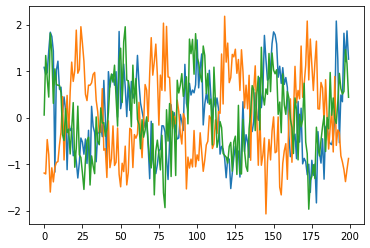

In [13]:
plt.plot(np.asarray(r[0,:]).squeeze().real[0:200]) # the asarray and squeeze are just annoyances we have to do because we came from a matrix
plt.plot(np.asarray(r[1,:]).squeeze().real[0:200])
plt.plot(np.asarray(r[2,:]).squeeze().real[0:200])
plt.show()

In [14]:
num_expected_signals = 3

In [15]:
r.shape

(5, 10000)

In [16]:
R = r @ r.conj().T
R

array([[ 14943.89214506  +0.j        ,  -9969.74213197 +87.10340903j,
         10001.83945202-121.74615595j,  -9979.74178412+222.71193471j,
          9941.59254902-257.74875476j],
       [ -9969.74213197 -87.10340903j,  15066.60241766  +0.j        ,
        -10056.51014521 +22.64971744j,  10000.12874204-137.15502784j,
        -10038.18627207+153.08350612j],
       [ 10001.83945202+121.74615595j, -10056.51014521 -22.64971744j,
         15059.25692293  +0.j        , -10015.65140966+121.72605752j,
         10047.73570655 -67.59430508j],
       [ -9979.74178412-222.71193471j,  10000.12874204+137.15502784j,
        -10015.65140966-121.72605752j,  15029.31928711  +0.j        ,
         -9979.78969533 -14.75276983j],
       [  9941.59254902+257.74875476j, -10038.18627207-153.08350612j,
         10047.73570655 +67.59430508j,  -9979.78969533 +14.75276983j,
         15081.60173781  +0.j        ]])

In [17]:
w, v = np.linalg.eig(R) # eigenvalue decomposition, v[:,i] is the eigenvector corresponding to the eigenvalue w[i]
w.shape, v.shape

((5,), (5, 5))

In [18]:
eig_val_order = np.argsort(np.abs(w)) # find order of magnitude of eigenvalues
eig_val_order

array([2, 3, 4, 1, 0])

In [19]:
v = v[:, eig_val_order] # sort eigenvectors using this order
v

array([[-0.50858398+0.00562109j,  0.54513796+0.00501342j,
         0.16711171-0.18319158j, -0.37753403-0.20435203j,
         0.44530871-0.00576137j],
       [ 0.18369259+0.27711648j,  0.24395523+0.11774453j,
         0.76893268+0.j        , -0.1264814 +0.09045037j,
        -0.44793602+0.00161495j],
       [ 0.63688629+0.j        ,  0.46788287+0.09304707j,
        -0.07755457+0.31594108j,  0.02849529+0.24314164j,
         0.44837528+0.j        ],
       [-0.20106171+0.10769073j,  0.61505745+0.j        ,
        -0.35962722+0.04005187j,  0.48568263-0.05665196j,
        -0.44679401-0.00483586j],
       [-0.15259064+0.38709569j, -0.15338082+0.0052968j ,
         0.32094672-0.08649215j,  0.70178529+0.j        ,
         0.44755817+0.00454923j]])

In [20]:
# We make a new eigenvector matrix representing the "noise subspace", it's just the rest of the eigenvalues
V = np.zeros((Nr, Nr - num_expected_signals), dtype=np.complex64)
V.shape

(5, 2)

In [21]:
for i in range(Nr - num_expected_signals):
   V[:, i] = v[:, i]
V[:,0].shape

(5,)

In [22]:
theta_scan = np.linspace(-1*np.pi, np.pi, 1000) # -180 to +180 degrees
theta_scan.shape

(1000,)

In [35]:
results = []
arrival_angle = theta_scan[0]
max_power = -9999
angles = []
test = 0
for theta_i in theta_scan:
    a = np.exp(-2j * np.pi * d * np.arange(Nr) * np.sin(theta_i)) # Steering Vector
    a = a.reshape(-1,1)
    metric = 1 / (a.conj().T @ V @ V.conj().T @ a) # The main MUSIC equation
    print(metric)
    test = metric
    metric = np.abs(metric.squeeze()) # take magnitude
    metric = 10*np.log10(metric) # convert to dB
    if metric > max_power:
        max_power = metric
        arrival_angle = theta_i
        angles.append(theta_i)
        #print(metric, arrival_angle)
    results.append(metric)
    break



[[0.27709029-4.26209216e-18j]]


In [24]:
results /= np.max(results) # normalize

In [28]:
results[0]

-0.101912851914051

In [26]:
angles[-2] * 180 / np.pi

85.58558558558556

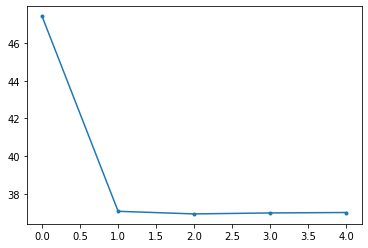

In [27]:
plt.plot(10*np.log10(np.abs(w)),'.-')